In [1]:
import pandas as pd
import numpy as np

from tkinter import filedialog as fd
from tkinter import Tk, BOTH

from datetime import datetime
from datetime import timedelta

from scipy import stats
from scipy.stats import norm
from sympy import *

import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:,.4f}'.format

import warnings
warnings.filterwarnings("ignore")

from typing import Tuple

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" #print all out

# Задача 1.

В результате эксперимента получена выборка объема $n=79$:

In [2]:
sample = [2, 4, 2, 4, 3, 3, 3, 2, 0, 6, 1, 2, 3, 2, 2, 
          4, 3, 3, 5, 1, 0, 2, 4, 3, 2, 2, 3, 3, 1, 3, 
          3, 3, 1, 1, 2, 3, 1, 4, 3, 1, 7, 4, 3, 4, 2, 
          3, 2, 3, 3, 1, 4, 3, 1, 4, 5, 3, 4, 2, 4, 5, 
          3, 6, 4, 1, 3, 2, 4, 1, 3, 1, 0, 0, 4, 6, 4, 
          7, 4, 1, 3]

df = pd.DataFrame(sample, columns=['x_i'])

#### Построим статистический ряд

In [3]:
df = df.value_counts().reset_index().sort_values(by='x_i').rename({0:'n_i'}, axis=1)

df

,x_i,n_i
4,0,4
3,1,13
2,2,14
0,3,24
1,4,16
5,5,3
6,6,3
7,7,2


#### Построим полигон частот

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7')]

Text(0, 3, '4')

Text(1, 12, '13')

Text(2, 13, '14')

Text(3, 23, '24')

Text(4, 15, '16')

Text(5, 2, '3')

Text(6, 2, '3')

Text(7, 1, '2')

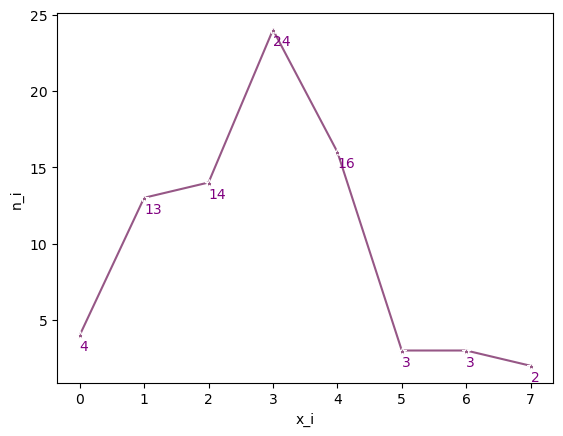

In [4]:
g = sns.lineplot(data=df,  x='x_i', y='n_i', marker='*', color='#965786')
g.set_xticks(df['x_i']) 
g.set_xticklabels(df['x_i'])

for x, y in zip(df['x_i'], df['n_i']):
    plt.text(x = x, y = y-1, s = '{:.0f}'.format(y), color = 'purple') 


plt.show()

#### Построим эмпирическую функцию распределения

In [5]:
df['w_i'] = df['n_i'] / df['n_i'].sum()
df['s_i'] = df['w_i'].cumsum()

In [6]:
df

,x_i,n_i,w_i,s_i
4,0,4,0.0506,0.0506
3,1,13,0.1646,0.2152
2,2,14,0.1772,0.3924
0,3,24,0.3038,0.6962
1,4,16,0.2025,0.8987
5,5,3,0.0380,0.9367
6,6,3,0.0380,0.9747
7,7,2,0.0253,1.0000


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7')]

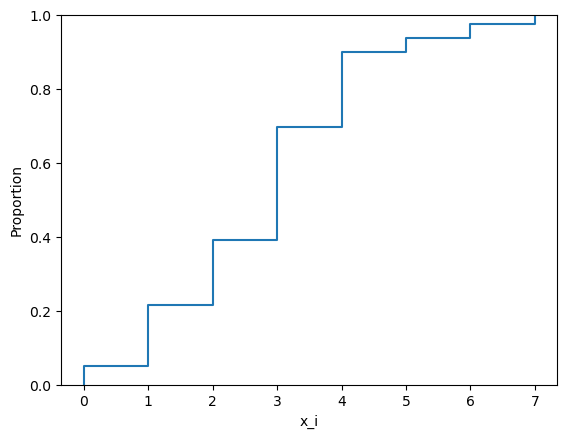

In [7]:
g = sns.ecdfplot(data=df,  x='x_i', weights='w_i')
g.set_xticks(df['x_i']) 
g.set_xticklabels(df['x_i'])

plt.show()

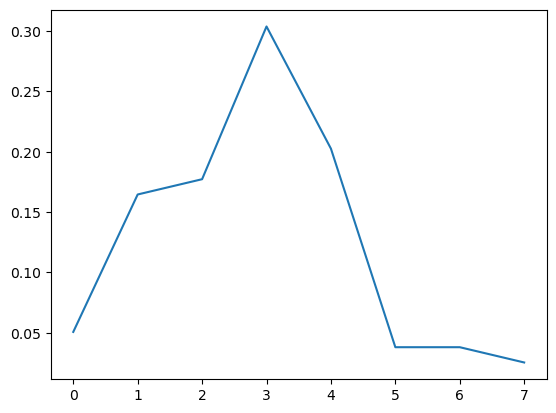

In [8]:
xk = df['x_i']
pk = df['w_i']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm_dist.pmf(xk))

plt.show()

#### Найдем выборочное среднее, диспрерсию и стандартное отклонение

In [9]:
mean = custm_dist.mean()
var = custm_dist.var()
std = custm_dist.std()

pd.DataFrame(data=[[mean, var, std]], 
             columns=['mean',' var', 'std'])

,mean,var,std
0,2.8354,2.3653,1.5380


In [10]:
mean = (df['x_i'] * df['n_i']).sum() / df['n_i'].sum()
var = ((((df['x_i'] - mean)**2) * df['n_i']).sum()) / (df['n_i'].sum())
std = np.sqrt(var)

pd.DataFrame(data=[[mean, var, std]], 
             columns=['mean',' var', 'std'])

,mean,var,std
0,2.8354,2.3653,1.5380


# Задача 2
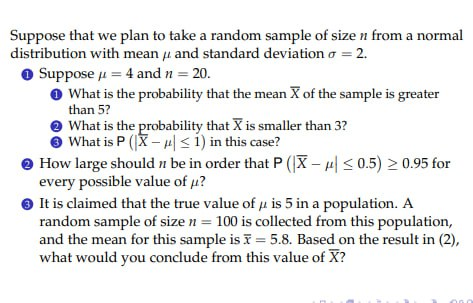

##

In [11]:
# Заданные параметры
mean = 4  # среднее значение μ
std = 2  # стандартное отклонение σ
n = 20  # размер выборки n

# Стандартная ошибка среднего
se = std / n**0.5

# Задание 1
# Вероятность того, что среднее значение выборки X больше 5
prob_greater_than_5 = 1 - norm.cdf(5, mean, se)

# Задание 2
# Вероятность того, что среднее значение выборки X меньше 3
prob_less_than_3 = norm.cdf(3, mean, se)

# Задание 3
# Вероятность того, что среднее значение выборки X отклоняется от μ менее чем на 1
prob_within_1 = norm.cdf(mean + 1, mean, se) - norm.cdf(mean - 1, mean, se)

# Решение заданий
prob_greater_than_5, prob_less_than_3, prob_within_1


(0.0126736593387341, 0.012673659338734126, 0.9746526813225318)

## 

In [12]:
n_large = 1
while True:
    se_large = std / (n_large ** 0.5)
    prob_within_05_of_mu = norm.cdf(mean + 0.5, mean, se_large) - norm.cdf(mean - 0.5, mean, se_large)
    if prob_within_05_of_mu >= 0.95:
        break
    n_large += 1
    
n_large

62

## 

In [13]:
n = 100
mean = 5
std = 2
se = std / n**0.5


prob = norm.pdf(5.8, mean, se)

prob

0.0006691511288244292

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Normal Distribution with mean = 5 and SE = 0.20')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Probability Density')

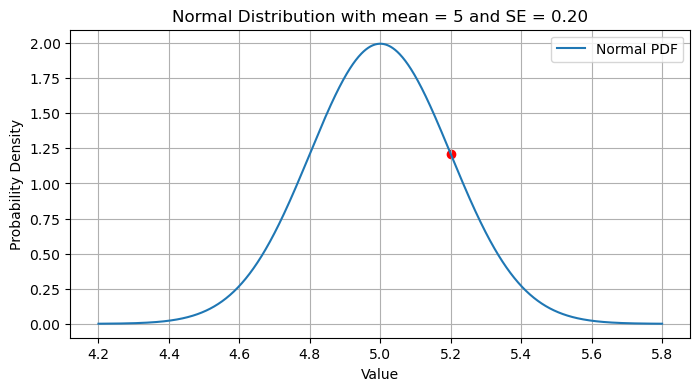

In [14]:
n = 100
mean = 5
std = 2
se = std / n**0.5


prob = norm.pdf(5.2, mean, se)

# Генерация значений для оси x и вычисление PDF для визуализации
x_values = np.linspace(mean - 4*se, mean + 4*se, 1000)
pdf_values = norm.pdf(x_values, mean, se)

# Построение графика
plt.figure(figsize=(8, 4))
plt.plot(x_values, pdf_values, label='Normal PDF')
plt.scatter([5.2], [prob], color='red')  # Точка, где x=5.2
plt.title(f'Normal Distribution with mean = {mean} and SE = {se:.2f}')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
prob

1.2098536225957157

## Задача 3

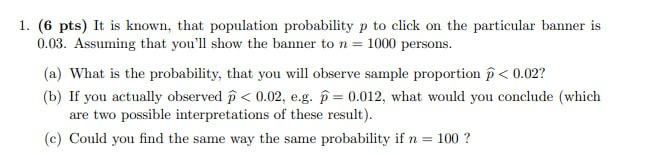

## a

In [17]:
p = 0.03
q = 1 - p
n = 1000

# Стандартная ошибка выборочной доли
se = (p*q/n)**0.5

# Z-оценка для p_hat = 0.02
p_hat = 0.02
z_score_a = (p_hat - p) / se

# Вероятность, что наблюдаемое p_hat < 0.02
prob = norm.cdf(z_score_a)

prob

0.03188675213519529

## b

In [18]:
# выборка смещенная?

In [19]:
p = 0.03
p_hat = 0.012
n = 1000

# Стандартная ошибка выборочной доли
se = (p*q/n)**0.5

# Z-оценка для наблюдаемого p_hat
z_score = (p_hat - p) / se

# Вероятность, что наблюдаемое p_hat < 0.012
prob = norm.cdf(z_score)

# Вычисляем также p-значение для двухстороннего теста
# Это нужно, чтобы определить, насколько необычно или экстремально наше наблюдаемое значение,
# предполагая, что истинное значение p = 0.03
p_value = 2 * norm.cdf(-abs(z_score)) # минус чтобы получить значение из левого хвоста

z_score, prob, p_value

(-3.336767989920291, 0.000423793352847682, 0.000847586705695364)

In [20]:
p_value = norm.sf(abs(z_score)) * 2

p_value

0.000847586705695364

In [21]:
p_value = 2 * (1 - norm.cdf(abs(z_score)))

p_value

0.0008475867056954023

## с

In [22]:
# Данные задачи
p = 0.03  # Истинная вероятность
q = 1 - p
n = 100
p_hat = 0.02

# Стандартная ошибка
se = (p * q / n) ** 0.5

# Z-оценка для p_hat = 0.02 и n = 100
z_score = (p_hat - p) / se

# Вероятность, что наблюдаемое p_hat < 0.02 для n = 100
prob = norm.cdf(z_score)

prob

0.2788670729711419